# Laptop Price Prediction using Regression

In [1]:
# Import the required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Do not disturbe mode
import warnings                                  
warnings.filterwarnings('ignore')

In [2]:
# Import the Laptop Price Data
df = pd.read_csv('laptop_price_data.csv')
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1303, 12)


In [3]:
# Drop the unwanted columns from the dataset
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Attributes present in the dataset for prediction
print("Attributes used for Laptop Price Prediction:\n", list(df.columns)[1:])


Attributes used for Laptop Price Prediction:
 ['TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']


In [4]:
# Sample of dataset
df.head(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000


In [5]:
# Describe the dataset with all the numerical attributes
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [6]:
# Print the information describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


<AxesSubplot:>

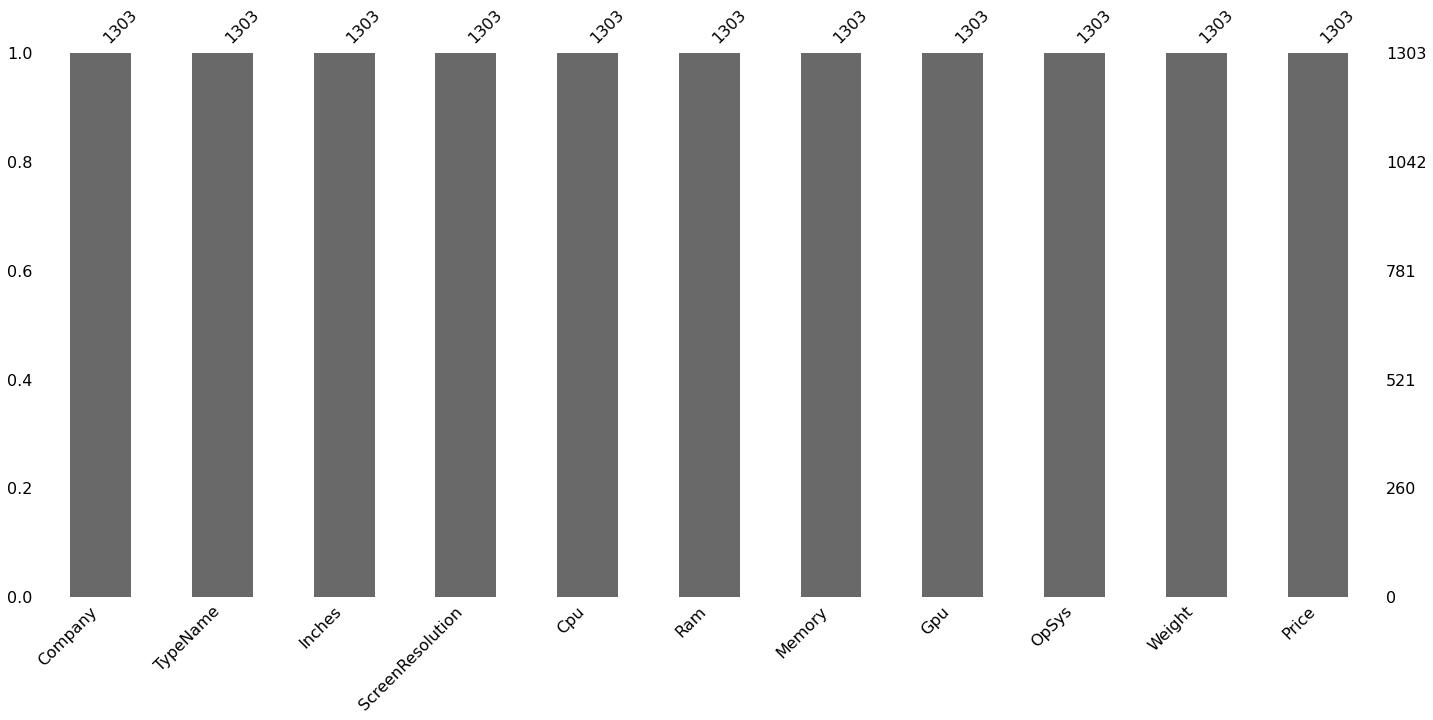

In [7]:
# Checking for NULL values:

import missingno as msn
msn.bar(df.iloc[:,:])

In [8]:
# Check for null values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Company'>

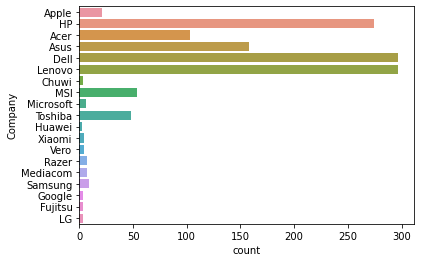

In [9]:
# Checking for column balancing:

import seaborn as sns
sns.countplot(y=df.loc[:, 'Company'],data=df)


<AxesSubplot:xlabel='count', ylabel='TypeName'>

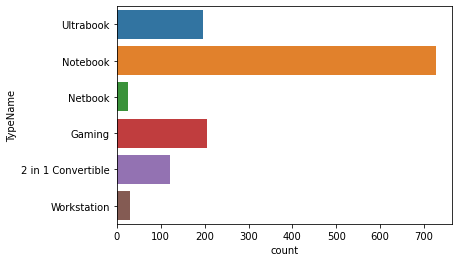

In [10]:
sns.countplot(y=df.loc[:, 'TypeName'],data=df)

<AxesSubplot:xlabel='count', ylabel='Inches'>

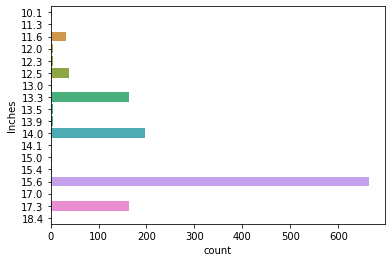

In [11]:
sns.countplot(y=df.loc[:, 'Inches'],data=df)

<AxesSubplot:xlabel='count', ylabel='Ram'>

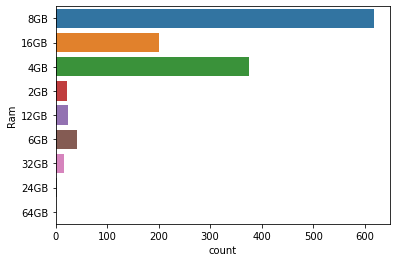

In [12]:
sns.countplot(y=df.loc[:, 'Ram'],data=df)

<AxesSubplot:xlabel='count', ylabel='OpSys'>

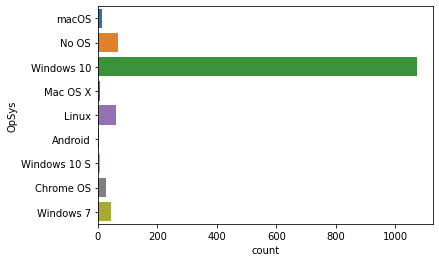

In [13]:
sns.countplot(y=df.loc[:, 'OpSys'],data=df)

In [14]:
# Check for duplicates
df.duplicated().sum()

29

In [15]:
# Convert Non-numerical attributes to numerical
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.columns = ['Company', 'Type Name', 'Inches', 'Screen Resolution', 'CPU', 'RAM(GB)', 'Memory', 'GPU', 'OpSys', 'Weight(kg)', 'Price']

In [16]:
df.head()

,Company,Type Name,Inches,Screen Resolution,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen Resolution  1303 non-null   object 
 4   CPU                1303 non-null   object 
 5   RAM(GB)            1303 non-null   int32  
 6   Memory             1303 non-null   object 
 7   GPU                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight(kg)         1303 non-null   float32
 10  Price              1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

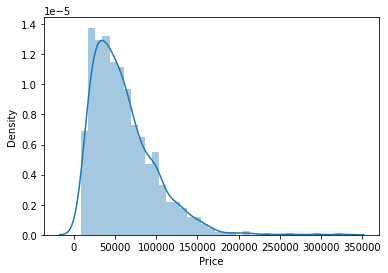

In [18]:
# Describe the price attribute
sns.distplot(df['Price'])

<AxesSubplot:>

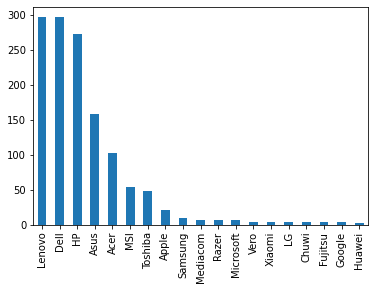

In [19]:
df['Company'].value_counts().plot(kind='bar')

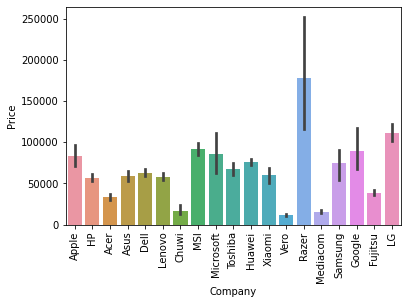

In [20]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

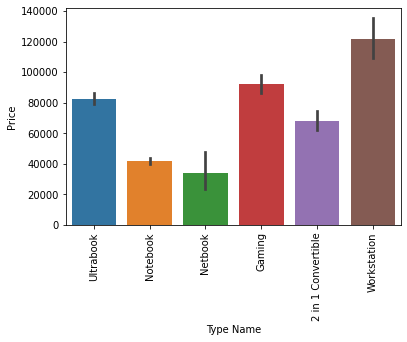

In [21]:
sns.barplot(x=df['Type Name'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

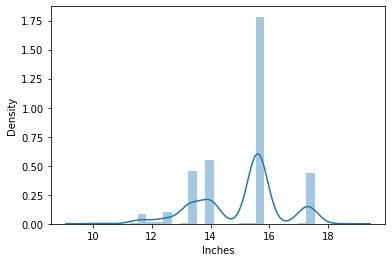

In [22]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

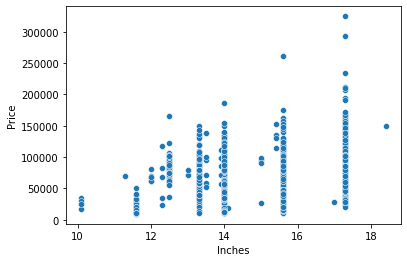

In [23]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [24]:
df['Screen Resolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [25]:
# Add Touch screen attribute to the dataset
df['Touchscreen'] = df['Screen Resolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
df.sample(5)

,Company,Type Name,Inches,Screen Resolution,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen
804,Dell,Netbook,11.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,1.63,39640.32,0
663,HP,Notebook,15.6,1920x1080,Intel Core i3 6006U 2GHz,6,1TB HDD,AMD Radeon R5 M430,Windows 10,2.04,28717.92,0
1175,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,40972.32,0
573,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,44222.40,0
872,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,73952.64,0


<AxesSubplot:>

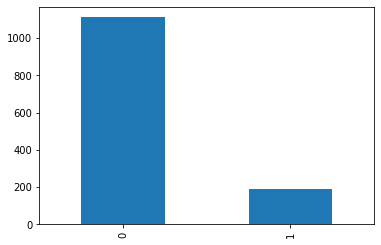

In [27]:
# Count of Laptops with and without touchscreens 
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

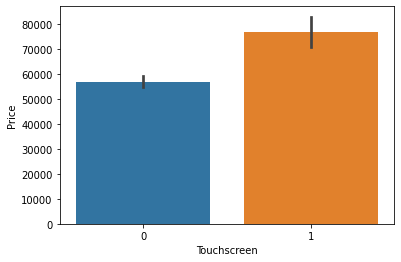

In [28]:
# Comparison between Prices of laptop with and without touchscreen
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [29]:
# Create Ips attribute
df['Ips'] = df['Screen Resolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.head()

,Company,Type Name,Inches,Screen Resolution,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

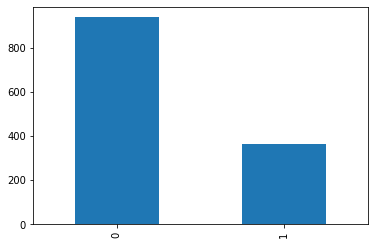

In [31]:
# Analyse Ips attribute
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

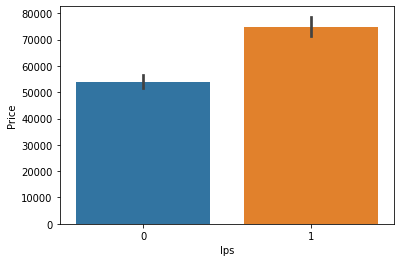

In [32]:
# Comparison between Prices of laptop with and without Ips
sns.barplot(x=df['Ips'],y=df['Price'])

In [33]:
# Create X-resolution and Y-resoltion for the dataset
new = df['Screen Resolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [34]:
df.sample(5)

,Company,Type Name,Inches,Screen Resolution,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,X_res,Y_res
827,Dell,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,31168.80,0,0,1366,768
173,Toshiba,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,26053.92,0,0,1366,768
697,Asus,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,35644.32,1,0,Full HD / Touchscreen 1920,1080
1149,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.27,124621.92,1,1,IPS Panel Touchscreen 2560,1440
292,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.54,26053.92,0,0,1600,900


In [35]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
df.head()

,Company,Type Name,Inches,Screen Resolution,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [37]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [38]:
# Create ppi attribute
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [39]:
# Correlation betwwen Prices attribute and other numerical attributes
df.corr()['Price']

Inches         0.068197
RAM(GB)        0.743007
Weight(kg)     0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [40]:
# Attribute 'Screen Resolution' is replaced with other attributes
df.drop(columns=['Screen Resolution'],inplace=True)

In [41]:
df.head()

,Company,Type Name,Inches,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [42]:
# Drop the columns
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [43]:
df.head()

,Company,Type Name,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [44]:
# Sum of laptops according to CPU type
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i7 2.2GHz                      1
Intel Core i5 7200U 2.70GHz               1
AMD A12-Series 9700P 2.5GHz               1
Intel Core i7 7500U 2.5GHz                1
Intel Celeron Dual Core N3350 2.0GHz      1
Name: CPU, Length: 118, dtype: int64

In [45]:
# Convert CPU names to generic names
df['CPU Name'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df.head()

,Company,Type Name,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [47]:
# Function for converting CPU name to generic brands
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [48]:
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

In [49]:
df.head()

,Company,Type Name,CPU,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

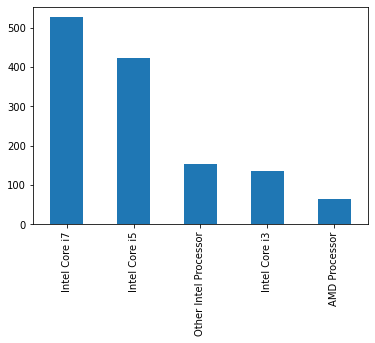

In [50]:
df['CPU Brand'].value_counts().plot(kind='bar')

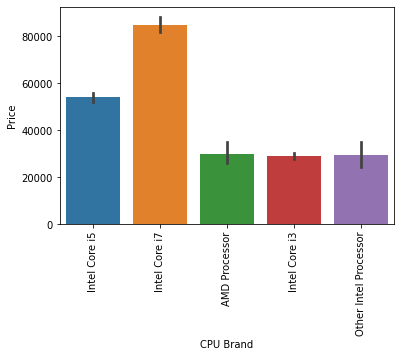

In [51]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.drop(columns=['CPU','CPU Name'],inplace=True)

In [53]:
df.head()

,Company,Type Name,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

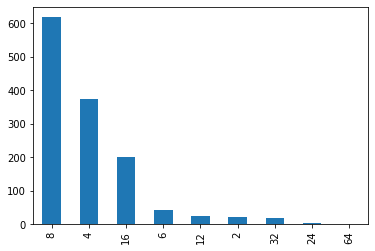

In [54]:
df['RAM(GB)'].value_counts().plot(kind='bar')

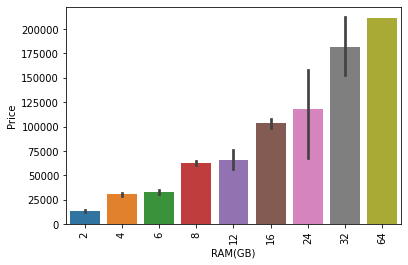

In [55]:
sns.barplot(x=df['RAM(GB)'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  1.0TB Hybrid          1
1

In [57]:
# create more useful fields
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [58]:
df.sample(5)

,Company,Type Name,RAM(GB),Memory,GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
884,Dell,Notebook,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0,100.454670,Other Intel Processor,500,0,0,0
1273,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0
1222,HP,Notebook,6,1000 HDD,AMD Radeon 530,Windows 10,2.10,28185.1200,0,0,141.211998,AMD Processor,1000,0,0,0
353,HP,Workstation,8,256 SSD,Nvidia Quadro M1200,Windows 10,2.60,92615.0256,0,0,141.211998,Intel Core i7,0,256,0,0
1134,Acer,Notebook,4,1000 HDD,Nvidia GeForce 940MX,Windows 10,2.23,32820.4800,0,0,141.211998,Intel Core i5,1000,0,0,0


In [59]:
# Drop memory attribute
df.drop(columns=['Memory'],inplace=True)

In [60]:
df.head()

,Company,Type Name,RAM(GB),GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
df.corr()['Price']

RAM(GB)          0.743007
Weight(kg)       0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [62]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [63]:
df.head()

,Company,Type Name,RAM(GB),GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [64]:
df['GPU'].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Nvidia Quadro M3000M          1
Nvidia GeForce GTX 1070M      1
AMD Radeon 540                1
AMD Radeon R5 520             1
Intel HD Graphics 620         1
Name: GPU, Length: 110, dtype: int64

In [65]:
# Convert GPU name to generic GPU Brands
df['GPU Brand'] = df['GPU'].apply(lambda x:x.split()[0])

In [66]:
df.head()

,Company,Type Name,RAM(GB),GPU,OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [67]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

In [68]:
# rRemove ARM GPU Laptops because of lack of records
df = df[df['GPU Brand'] != 'ARM']

In [69]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Brand, dtype: int64

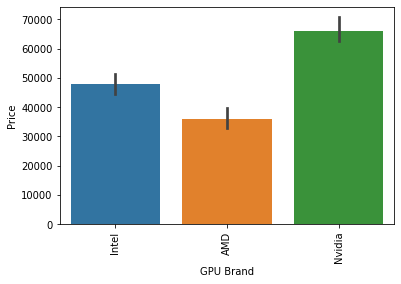

In [70]:
sns.barplot(x=df['GPU Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
df.drop(columns=['GPU'],inplace=True)

In [72]:
df.head()

,Company,Type Name,RAM(GB),OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [73]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

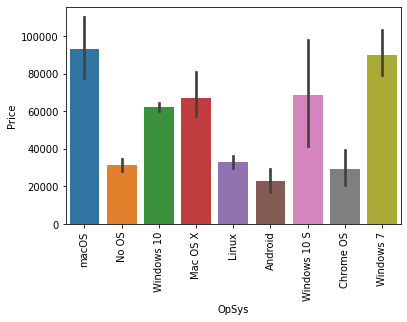

In [74]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
# Function to convert Operating System to generic OS
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [76]:
df['os'] = df['OpSys'].apply(cat_os)

In [77]:
df.head()

,Company,Type Name,RAM(GB),OpSys,Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [78]:
df.drop(columns=['OpSys'],inplace=True)

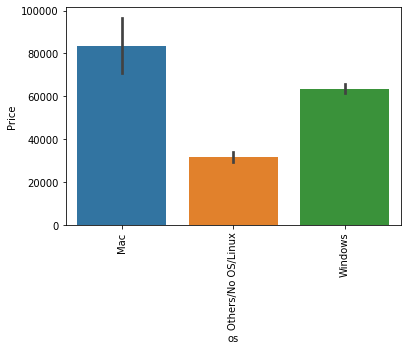

In [79]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight(kg)', ylabel='Density'>

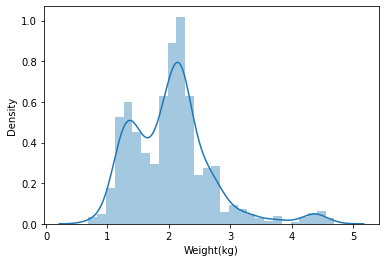

In [80]:
sns.distplot(df['Weight(kg)'])

<AxesSubplot:xlabel='Weight(kg)', ylabel='Price'>

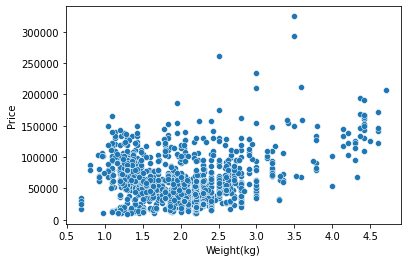

In [81]:
sns.scatterplot(x=df['Weight(kg)'],y=df['Price'])

In [82]:
# Correlation between Price and other numeric attributes
df.corr()['Price']

RAM(GB)        0.742905
Weight(kg)     0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

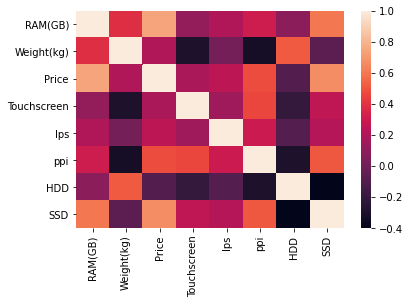

In [83]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

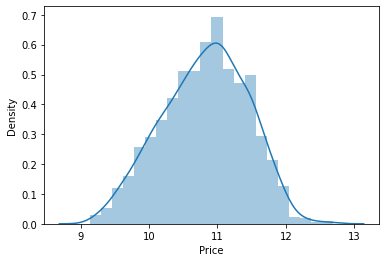

In [84]:
# log function of Price represents a normal distribution
sns.distplot(np.log(df['Price']))

In [85]:
display(df)

,Company,Type Name,RAM(GB),Weight(kg),Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [85]:
# Input and Output Features
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [86]:
# Input Attributes
X

,Company,Type Name,RAM(GB),Weight(kg),Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [87]:
# Output Feature
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# Machine Learning Model Training

In [88]:
# Converting categorical data to numerical data using one hot encoding
# Encode categorical features as a one-hot numeric array
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("col_tnf", OneHotEncoder(sparse=False,drop='first'), [0,1,7,10,11])], remainder = 'passthrough')
X = ct.fit_transform(X)

# One hot encoding completed
print('Shape of Matrix: ',X.shape)

Shape of Matrix:  (1302, 38)


# Model Training using Pycaret

In [100]:
# Dataset Preparation for Model Training
# Prepare for Model
df_laptop = pd.DataFrame(data = X, columns=['Feature'+str(i) for i in range(1,X.shape[1]+1)])
df_laptop['Price'] = y
df_laptop.head(10)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.37,0.0,1.0,226.983005,0.0,128.0,11.175755
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.34,0.0,0.0,127.677940,0.0,0.0,10.776777
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,8.0,1.86,0.0,0.0,141.211998,0.0,256.0,10.329931
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,1.83,0.0,1.0,220.534624,0.0,512.0,11.814476
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.37,0.0,1.0,226.983005,0.0,256.0,11.473101
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.10,0.0,0.0,100.454670,500.0,0.0,9.967026
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,2.04,0.0,1.0,220.534624,0.0,0.0,11.644108
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.34,0.0,0.0,127.677940,0.0,0.0,11.030615
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.0,1.30,0.0,0.0,157.350512,0.0,512.0,11.285443
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8.0,1.60,0.0,1.0,157.350512,0.0,256.0,10.621952


In [101]:
# Pycaret Regression
from pycaret.regression import *
exp_name = setup(data=df_laptop,  target = 'Price', session_id=1,train_size=0.70, normalize=True, normalize_method='zscore', transformation=True, transformation_method='yeo-johnson')
best_model = compare_models(fold=10, sort = 'R2', round=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2177,0.1028,0.3169,0.7405,0.0270,0.0202,0.0280
catboost,CatBoost Regressor,0.2147,0.1037,0.3189,0.7363,0.0271,0.0199,2.8640
rf,Random Forest Regressor,0.2215,0.1069,0.3228,0.7298,0.0275,0.0206,0.2280
gbr,Gradient Boosting Regressor,0.2281,0.1083,0.3262,0.7251,0.0278,0.0212,0.0460
xgboost,Extreme Gradient Boosting,0.2274,0.1191,0.3417,0.6971,0.0290,0.0210,0.7280
ridge,Ridge Regression,0.2490,0.1202,0.3449,0.6963,0.0293,0.0231,0.0100
lr,Linear Regression,0.2490,0.1202,0.3451,0.6961,0.0293,0.0231,1.0300
knn,K Neighbors Regressor,0.2439,0.1206,0.3444,0.6953,0.0293,0.0227,0.0300
br,Bayesian Ridge,0.2508,0.1215,0.3466,0.6931,0.0295,0.0233,0.0100
et,Extra Trees Regressor,0.2343,0.1277,0.3517,0.6777,0.0298,0.0217,0.2400


# Create the Model for the best classifier

In [102]:
model = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1971,0.0878,0.2963,0.7798,0.0251,0.0183
1,0.2091,0.0835,0.2889,0.8245,0.0245,0.0195
2,0.1764,0.0518,0.2276,0.8517,0.0193,0.0163
3,0.2591,0.1526,0.3906,0.6496,0.0334,0.0243
4,0.2013,0.0761,0.2759,0.8110,0.0233,0.0186
5,0.2082,0.0818,0.2860,0.7641,0.0244,0.0194
6,0.2152,0.1224,0.3498,0.6442,0.0301,0.0201
7,0.2257,0.1215,0.3485,0.7046,0.0295,0.0206
8,0.2210,0.1033,0.3214,0.7574,0.0278,0.0209
9,0.2638,0.1473,0.3838,0.6180,0.0325,0.0241


# Tune the Model

In [103]:
# Tune hyperparameters to optimize F1 Score
tuned_model = tune_model(model, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2147,0.1016,0.3187,0.7452,0.0269,0.0199
1,0.2121,0.0823,0.2868,0.8271,0.0244,0.0198
2,0.1811,0.0532,0.2306,0.8477,0.0195,0.0167
3,0.2594,0.1461,0.3822,0.6645,0.0327,0.0243
4,0.2120,0.0799,0.2827,0.8015,0.0239,0.0196
5,0.2065,0.0807,0.2841,0.7672,0.0241,0.0192
6,0.2165,0.1252,0.3539,0.6358,0.0304,0.0201
7,0.2318,0.1232,0.3510,0.7003,0.0297,0.0212
8,0.2169,0.1077,0.3281,0.7471,0.0283,0.0205
9,0.2655,0.1465,0.3828,0.6198,0.0324,0.0243


No benefit of tuning in this case. We will be using the original model and not the tuned model.

# Plot the Model

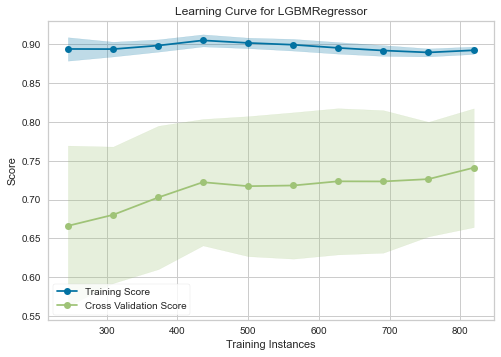

In [104]:
# Learning curve
plot_model(estimator = model, plot = 'learning', save = False, verbose = True)

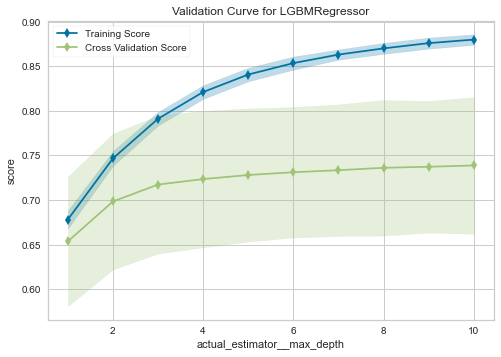

In [105]:
# Validation Curve
plot_model(estimator = model, plot = 'vc', save = False, verbose = True)

In [106]:
# Model Hyperparameter
plot_model(estimator = model, plot = 'parameter', save = False, verbose = True)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


# Finalize Model

In [109]:
#save trained model
save_model(model, 'laptop_price_predictor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                  

# Export the Model for deployment

In [110]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

NameError: name 'pipe' is not defined

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

NameError: name 'Ridge' is not defined

### Lasso Regression

In [838]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.827423360044165
MAE 0.20687579230156897


### KNN

In [839]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8072030376561001
MAE 0.21481709364359294


### Decision Tree

In [840]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8121486161709328
MAE 0.20636075537634155


### SVM

In [841]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8156759646505531
MAE 0.20227639666135966


### Random Forest

In [842]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8774235595277262
MAE 0.1694126730578894


### ExtraTrees

In [843]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8734884757020003
MAE 0.16811973442825764


### AdaBoost

In [844]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7886647442043055
MAE 0.23293278206188936


### Gradient Boost

In [845]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8897592357672206
MAE 0.15589622893103483


### XgBoost

In [846]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8899639365114643
MAE 0.1584688786210926


### Voting Regressor

In [847]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8858487973682468
MAE 0.16620216666279938


### Stacking

In [325]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8783253424118734
MAE 0.1694337800072075


### Exporting the Model

In [308]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [307]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [309]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
